# COVID-19 Genome Bioinformatics
The objective of this notebook is to analyze the COVID-19 (SARS-Cov-2) DNA sequence data in order to gain insight regarding the proteins that are translated. I will then compare the COVID-19 DNA with that of MERS (Middle East Respiratory Syndrome) and SARS (Severe Acute Respiratory Syndrome). These comprise the large family of coronaviruses which will also include zoonotic (animal-based) viruses such as bat coronavirus, civet coronavirus, camel coronavirus, etc. 
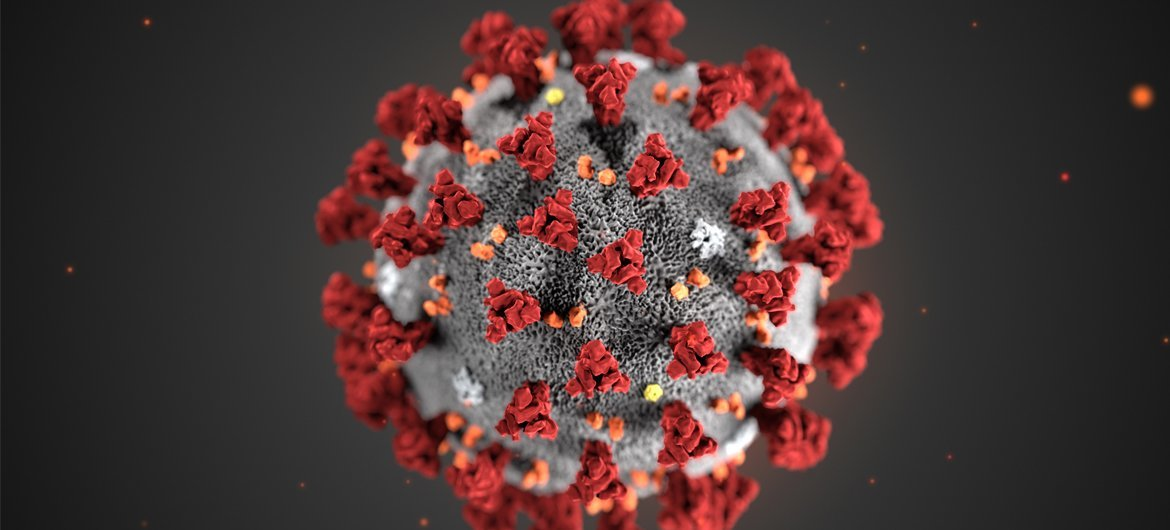

##### Note: This code was written in May 2020 for the purpose of generating an RNA vaccine. I realize we already have created RNA vaccines, but this is just an updated (2024) version of that original code in which I've added Pangolin-CoV. Unfortunately, this also means that my original 4 year old code is deprecated so I will be debugging as well.

In [1]:
# Last updated: 9/25/2024.
# Copyright 2023 Shane Khalid. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

The COVID-19 genome (SARS-CoV-2) is an RNA genome consisting of ~30k nucleotides. Within the genome is encoded instructions for viral replication, protein synthesis (central dogma), and host-cell interaction. Thus, understanding the COVID-19 genome is vital for developing diagnostic tests, vaccines, and treatments. This can be aided by identifying various genetic markers, mutations, and potential targets for interventions. In addition to helping the tracking of the spread of the virus, studying its evolutionary changes, and designing effective strategies to control the disease.
<div style="text-align: center;">
    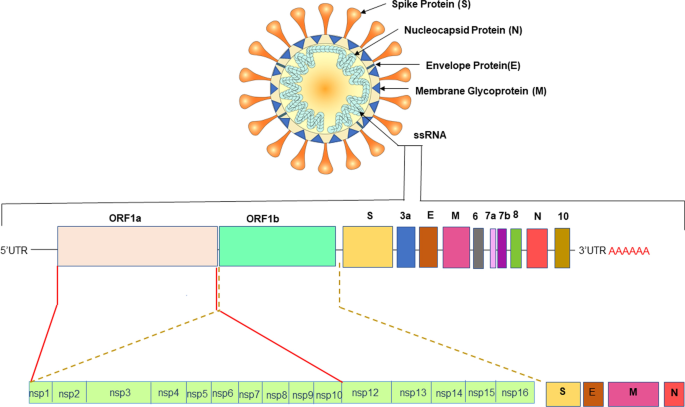 <br>
    <img src="https://images.theconversation.com/files/324780/original/file-20200402-23151-18gxxtu.png" width=500 height=500>
</div>



## Let's start by loading the libraries and dependencies
I will primarily be using [Biopython](https://biopython.org/) like [this](https://wiki.genometracker.org/~weigang/BioPython.html)

In [2]:
import numpy as np
import pandas as pd
import re
import plotly.offline as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import os
os.environ['QT_QPA_PLATFORM']='offscreen' # https://github.com/etetoolkit/ete/issues/296

import matplotlib.pyplot as plt
%matplotlib inline
from colorama import Back, Style, Fore

try:
    from Bio.Align.Applications import ClustalwCommandline
    from Bio import Align, pairwise2
except:
    !pip install biopython
    from Bio.Align.Applications import ClustalwCommandline
    from Bio import Align, pairwise2
try:
    from ete3 import Tree, TreeStyle
except:
    !pip install ete3
    from ete3 import Tree, TreeStyle

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\Bio\Application\__init__.py:39: BiopythonDeprecationWarning:

The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning:

Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pa

In [3]:
import numpy as np
import pandas as pd
import re
import plotly.offline as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import os
os.environ['QT_QPA_PLATFORM'] = 'offscreen'  # https://github.com/etetoolkit/ete/issues/296

import matplotlib.pyplot as plt
%matplotlib inline
from colorama import Back, Style, Fore

# Alternative to deprecated ClustalwCommandline: Use subprocess for running ClustalW
import subprocess

def run_clustalw(input_file):
    """Run ClustalW using subprocess instead of Biopython's deprecated wrapper."""
    command = ['clustalw', input_file]
    subprocess.run(command, check=True)

# Replace pairwise2 with the modern PairwiseAligner
from Bio.Align import PairwiseAligner

# Example of using PairwiseAligner for sequence alignment
aligner = PairwiseAligner()
aligner.mode = 'global'  # For global alignment, or 'local' for local alignment

# Example sequences
seq1 = "GATTACA"
seq2 = "GCATGCU"

# Perform alignment
alignments = aligner.align(seq1, seq2)

# Show alignment results
for alignment in alignments:
    print(alignment)

# Import ete3 for phylogenetic tree generation
try:
    from ete3 import Tree, TreeStyle
except ImportError:
    !pip install ete3  # Install ete3 if not already installed
    from ete3 import Tree, TreeStyle


target            0 G-ATTA-CA-  7
                  0 |-||---|-- 10
query             0 GCAT--GC-U  7

target            0 G-ATTA-CA-  7
                  0 |-|-|--|-- 10
query             0 GCA-T-GC-U  7

target            0 G-ATT-ACA-  7
                  0 |-||---|-- 10
query             0 GCAT-G-C-U  7

target            0 G-ATT-ACA-  7
                  0 |-|-|--|-- 10
query             0 GCA-TG-C-U  7

target            0 G-AT-TACA-  7
                  0 |-||---|-- 10
query             0 GCATG--C-U  7

target            0 G-ATTACA- 7
                  0 |-||.-|-- 9
query             0 GCATG-C-U 7

target            0 G-ATTACA- 7
                  0 |-||-.|-- 9
query             0 GCAT-GC-U 7

target            0 G-ATTACA- 7
                  0 |-|-|.|-- 9
query             0 GCA-TGC-U 7

target            0 G-ATTA-C-A  7
                  0 |-||---|-- 10
query             0 GCAT--GCU-  7

target            0 G-ATTA-C-A  7
                  0 |-|-|--|-- 10
query             0 GCA

In [4]:
import numpy as np
import pandas as pd
import re
import plotly.offline as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import os
os.environ['QT_QPA_PLATFORM'] = 'offscreen'  # https://github.com/etetoolkit/ete/issues/296

import matplotlib.pyplot as plt
%matplotlib inline
from colorama import Back, Style, Fore

# Alternative to deprecated ClustalwCommandline: Use subprocess for running ClustalW
import subprocess

def run_clustalw(input_file):
    """Run ClustalW using subprocess instead of Biopython's deprecated wrapper."""
    command = ['clustalw', input_file]
    subprocess.run(command, check=True)

# Replace pairwise2 with the modern PairwiseAligner
from Bio.Align import PairwiseAligner

aligner = PairwiseAligner()
aligner.mode = 'global'  # For global alignment, or 'local' for local alignment

# Import ete3 for phylogenetic tree generation
try:
    from ete3 import Tree, TreeStyle
except ImportError:
    !pip install ete3  # Install ete3 if not already installed
    from ete3 import Tree, TreeStyle


Now load the various genomes

In [5]:
# covid-19 genome
with open("E:/coding/COVID_Genome/cov2.fasta", "r") as file:
    cov_genome = file.read().split("genome")[1].replace("\n", "")
# mers genome
with open ("E:/coding/COVID_Genome/mers.fasta", "r") as file:
    mers_genome = file.read().split("genome")[1].replace("\n", "")
# sars genome
with open ("E:/coding/COVID_Genome/sars.fasta", "r") as file:
    sars_genome = file.read().split("genome")[1].replace("\n", "")
# civet with sars like cov genome
with open("E:/coding/COVID_Genome/Civet-SARS.fasta", "r") as file:
    civet_sl_cov_genome = file.read().split("complete genome")[-1].replace("\n","")
# bat with sars like cov genome
with open("E:/coding/COVID_Genome/BAT-SARS.fasta", "r") as file:
    bat_sl_cov_genome = file.read().split("complete genome")[-1].replace("\n","")
# ebola-5 genome
with open("E:/coding/COVID_Genome/EBOLAV.fasta", "r") as file:
    ebola5_genome = file.read().split("complete genome")[-1].replace("\n","")
# pangolin with cov genome
with open("E:/coding/COVID_Genome/pangolin.fasta", "r") as file:
    pangolin_cov_genome = file.read().split("complete genome")[-1].replace("\n", "")
# malaria genome
with open("E:/coding/COVID_Genome/plasmodium-malariae.fasta", "r") as file:
    malaria_genome = file.read().split("complete sequence")[-1].replace("\n", "")
# hiv-2 genome
with open("E:/coding/COVID_Genome/hiv2.fasta", "r") as file:
    hiv2_genome = file.read().split("complete genome")[-1].replace("\n", "")
# hedgehog with cov genome
with open("E:/coding/COVID_Genome/hedgehog.fasta", "r") as file:
    hedgehog_cov_genome = file.read().split("complete genome")[-1].replace("\n", "")

## Comparison of genome compositions
Reverse-vaccinology involves the analysis of an organism's genome to identify potential antigens and epitopes. 
- Genome screening: Identifying proteins in a microorganism's genome that are likely to be secreted or exposed on the surface
- Cloning and expression: Cloning and expressing the proteins identified in the genome screening
- Antibody testing: Testing the proteins to see if they can produce antibodies in mice that can neutralize or kill the target pathogen 

<div style="text-align: center;">
    <img src="https://www.researchgate.net/publication/257740125/figure/fig12/AS:669616980373518@1536660537438/Reverse-vaccinology-approach-In-the-search-for-vaccine-candidates-the-first-level-of.jpg" width=500 height=500>
</div>

For the comparison, I will be looking at oligonucleotides which are a sequence of nucleotides of varying lengths which can be represented as "[k-mer](https://en.wikipedia.org/wiki/K-mer)", particularly 3-mers (trimers) and 4-mers (tetramers).

In [6]:
# tri-nucleotide compositions
trimers = ["AAA", "AAC", "AAG", "AAT", "ACA", "ACC", "ACG", "ACT", "AGA", "AGC", "AGG", "ATA", "ATC", "ATG", "CAA", 
           "CAC", "CAG", "CCA","CCC","CCG","CGA","CGC","CTA","CTC","GAA","GAC","GCA","GCC","GGA","GTA","TAA","TCA"]

def trimer_composition(genome):
    trimer_dict = dict()
    for trimer in trimers:
        trimer_dict[trimer] = genome.count(trimer)
    return trimer_dict

# tetra-nucleotide compositions
tetramers = ['AAAA','AAAC','AAAG','AAAT','AACA','AACC','AACG','AACT','AAGA','AAGC','AAGG','AAGT','AATA','AATC',
             'AATG','AATT','ACAA','ACAC','ACAG','ACAT','ACCA','ACCC','ACCG','ACCT','ACGA','ACGC','ACGG','ACGT',
             'ACTA','ACTC','ACTG','AGAA','AGAC','AGAG','AGAT','AGCA','AGCC','AGCG','AGCT','AGGA','AGGC','AGGG',
             'AGTA','AGTC','AGTG','ATAA','ATAC','ATAG','ATAT','ATCA','ATCC','ATCG','ATGA','ATGC','ATGG','ATTA',
             'ATTC','ATTG','CAAA','CAAC','CAAG','CACA','CACC','CACG','CAGA','CAGC','CAGG','CATA','CATC','CATG',
             'CCAA','CCAC','CCAG','CCCA','CCCC','CCCG','CCGA','CCGC','CCGG','CCTA','CCTC','CGAA','CGAC','CGAG',
             'CGCA','CGCC','CGCG','CGGA','CGGC','CGTA','CGTC','CTAA','CTAC','CTAG','CTCA','CTCC','CTGA','CTGC',
             'CTTA','CTTC','GAAA','GAAC','GACA','GACC','GAGA','GAGC','GATA','GATC','GCAA','GCAC','GCCA','GCCC',
             'GCGA','GCGC','GCTA','GGAA','GGAC','GGCA','GGCC','GGGA','GGTA','GTAA','GTAC','GTCA','GTGA','GTTA',
             'TAAA','TACA','TAGA','TATA','TCAA','TCCA','TCGA','TGAA','TGCA','TTAA']

def tetramer_composition(genome):
    tetramer_dict = dict()
    for tetramer in tetramers:
        if tetramer in genome:
            tetramer_dict[tetramer] = genome.count(tetramer)
        else:
            tetramer_dict[tetramer] = 0
    return tetramer_dict

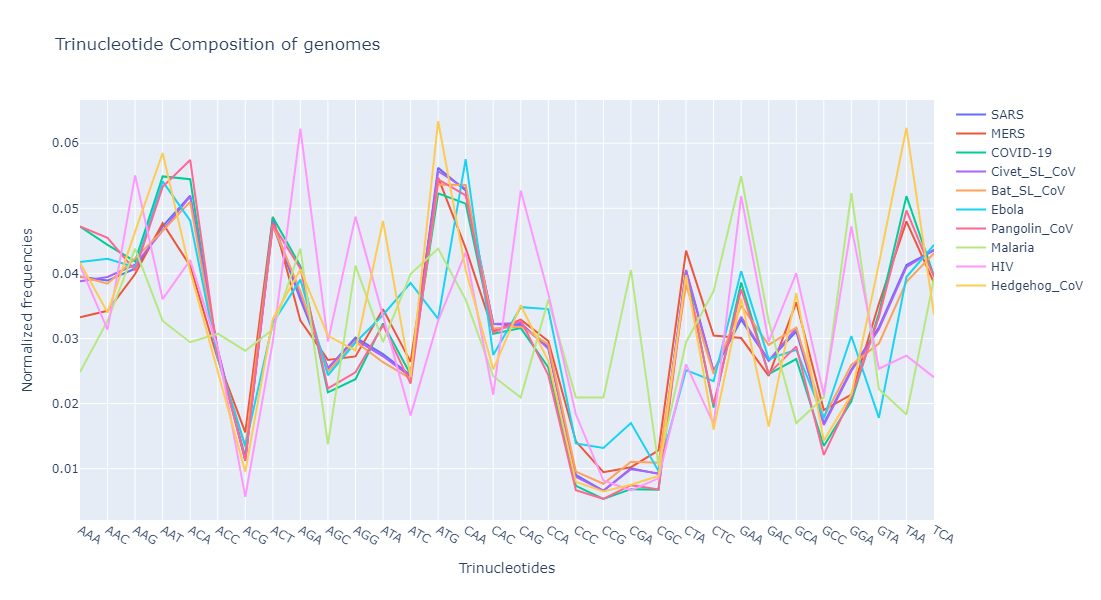

In [7]:
labels = ["SARS", "MERS", "COVID-19", "Civet_SL_CoV","Bat_SL_CoV","Ebola", "Pangolin_CoV","Malaria","HIV","Hedgehog_CoV"]

traces = []
for i, genome in enumerate((sars_genome,mers_genome,cov_genome,civet_sl_cov_genome,bat_sl_cov_genome,ebola5_genome,
                            pangolin_cov_genome,malaria_genome,hiv2_genome,hedgehog_cov_genome)):
    composition = trimer_composition(genome)
    total_composition = sum(composition.values())
    norm_freq = [count/total_composition for count in composition.values()]
    traces.append(go.Scatter(x=trimers,y=norm_freq,mode='lines',name=labels[i]))
    
layout=go.Layout(
    title="Trinucleotide Composition of genomes",
    xaxis_title="Trinucleotides",
    yaxis_title="Normalized frequencies",
    width=800, height=600
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename="3mer-composition-frequency")

Now, I know this looks like a big mess. But in plotly you can turn off (deselect) from the legend to have fewer lines show up. Let's now do the same for tetramers.

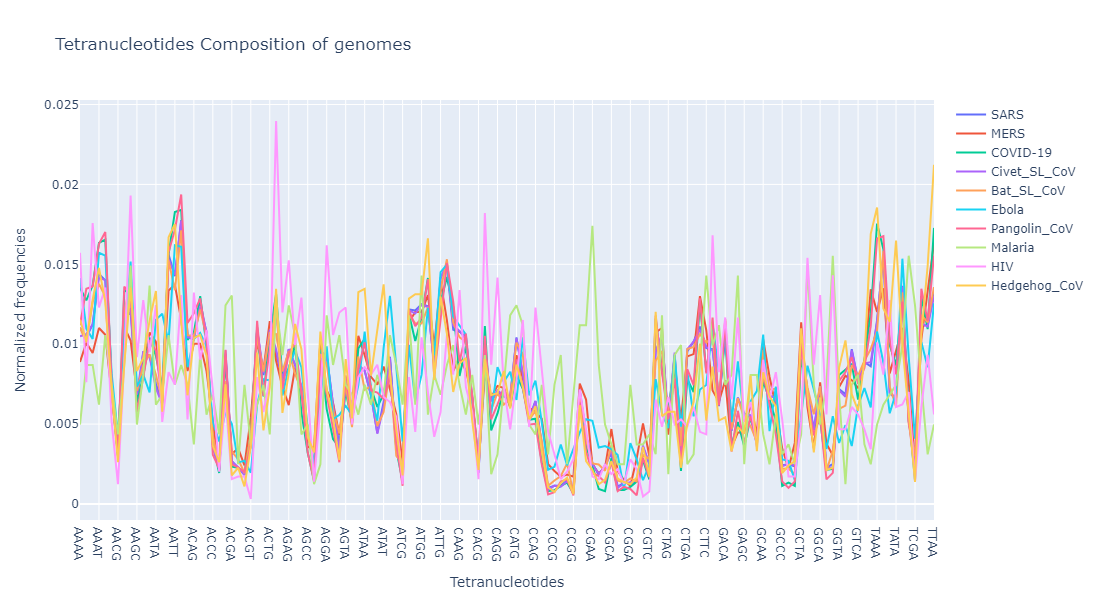

In [12]:
labels = ["SARS", "MERS", "COVID-19", "Civet_SL_CoV","Bat_SL_CoV","Ebola", "Pangolin_CoV","Malaria","HIV","Hedgehog_CoV"]

traces = []
for i, genome in enumerate((sars_genome,mers_genome,cov_genome,civet_sl_cov_genome,bat_sl_cov_genome,ebola5_genome,
                            pangolin_cov_genome,malaria_genome,hiv2_genome,hedgehog_cov_genome)):
    composition = tetramer_composition(genome)
    total_composition = sum(composition.values())
    norm_freq = [count/total_composition for count in composition.values()]
    traces.append(go.Scatter(x=tetramers,y=norm_freq,mode='lines',name=labels[i]))
    
layout=go.Layout(
    title="Tetranucleotides Composition of genomes",
    xaxis_title="Tetranucleotides",
    yaxis_title="Normalized frequencies",
    width=1000, height=600
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename="4mer-composition-frequency")

### GC Content
This is another critical metric for genome analysis and evolutionary biology because it confers thermal stability as well as being highly conserved evolutionarily. This means that organisms or in our case, strains with significantly difference GC content can indicate evolutionary divergence. An example would be gene-coding regions tend to have higher GC content than non-coding regions. 

$$\frac{G + C}{A + C + G + T} \times 100\ \%$$

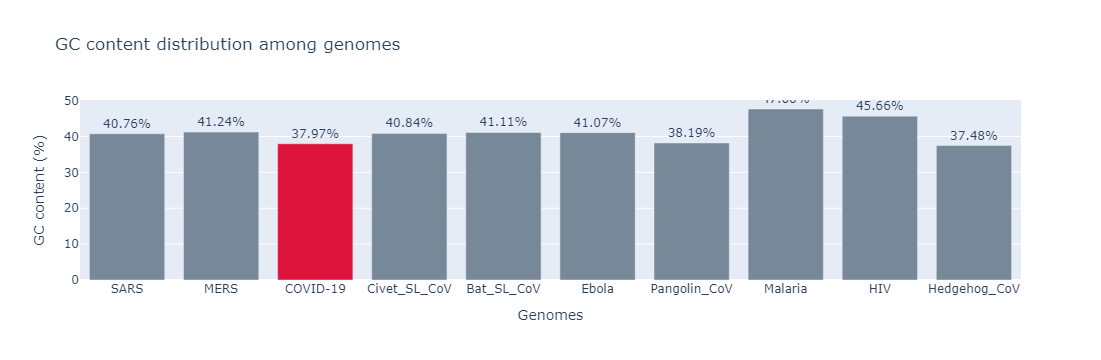

In [8]:
def gc_content(genome):
    g_content = genome.count("G")
    c_content = genome.count("C")
    a_content = genome.count("A")
    t_content = genome.count("T")
    return 100*((g_content+c_content)/(a_content+c_content+g_content+t_content))

gc_content_perc = [gc_content(sars_genome),gc_content(mers_genome),gc_content(cov_genome),gc_content(civet_sl_cov_genome),
                   gc_content(bat_sl_cov_genome),gc_content(ebola5_genome),gc_content(pangolin_cov_genome),
                   gc_content(malaria_genome),gc_content(hiv2_genome), gc_content(hedgehog_cov_genome)]
viruses = ["SARS", "MERS", "COVID-19", "Civet_SL_CoV","Bat_SL_CoV","Ebola","Pangolin_CoV","Malaria","HIV","Hedgehog_CoV"]
colors = ["lightslategray",] * 10
colors[2] = "crimson"

fig = go.Figure(data=[go.Bar(
    x=viruses,
    y=gc_content_perc,
    text=gc_content_perc,
    marker_color=colors
)])
fig.update_traces(texttemplate="%{text:.2f}%", textposition="outside")
fig.update_layout(
    title_text="GC content distribution among genomes",
    xaxis_title="Genomes",
    yaxis_title="GC content (%)"
)

In [7]:
def gen_protein_seq(genome_str):
    # codon table from wiki
    protein = {"TTT" : "F", "CTT" : "L", "ATT" : "I", "GTT" : "V",
           "TTC" : "F", "CTC" : "L", "ATC" : "I", "GTC" : "V",
           "TTA" : "L", "CTA" : "L", "ATA" : "I", "GTA" : "V",
           "TTG" : "L", "CTG" : "L", "ATG" : "M", "GTG" : "V",
           "TCT" : "S", "CCT" : "P", "ACT" : "T", "GCT" : "A",
           "TCC" : "S", "CCC" : "P", "ACC" : "T", "GCC" : "A",
           "TCA" : "S", "CCA" : "P", "ACA" : "T", "GCA" : "A",
           "TCG" : "S", "CCG" : "P", "ACG" : "T", "GCG" : "A",
           "TAT" : "Y", "CAT" : "H", "AAT" : "N", "GAT" : "D",
           "TAC" : "Y", "CAC" : "H", "AAC" : "N", "GAC" : "D",
           "TAA" : "STOP", "CAA" : "Q", "AAA" : "K", "GAA" : "E",
           "TAG" : "STOP", "CAG" : "Q", "AAG" : "K", "GAG" : "E",
           "TGT" : "C", "CGT" : "R", "AGT" : "S", "GGT" : "G",
           "TGC" : "C", "CGC" : "R", "AGC" : "S", "GGC" : "G",
           "TGA" : "STOP", "CGA" : "R", "AGA" : "R", "GGA" : "G",
           "TGG" : "W", "CGG" : "R", "AGG" : "R", "GGG" : "G" 
           }
    protein_seq = ""
    
    # generating the protein seq
    for i in range(0, len(genome_str)-(3+len(genome_str)%3), 3):
        protein_seq += protein[genome_str[i:i+3]]
    return protein_seq

In [8]:
# some helper functions for representation of sequences

# usually DNA sequences are written in 10-nucleotide fashion
def ten_nucleotide_seq(genome):
    genes = []
    for ix, char in enumerate(genome):
        if ix != 0 and ix%10 == 0:
            genes.append(' ')
        genes.append(char)
    return ''.join(genes)

# color code to represent genome sequences
nu_clr_switcher = {
    # standard color-codes
    'A': Back.GREEN,
    'C': Back.YELLOW,
    'G': Back.RED,
    'T': Back.BLUE,
    ' ': Style.RESET_ALL
}
protein_clr_switcher = {
    # color-code by proteinfamily's polarity
    'A': Back.BLUE,
    'V': Back.BLUE,
    'I': Back.BLUE,
    'L': Back.BLUE,
    'M': Back.BLUE,
    'F': Back.BLUE,
    'Y': Back.CYAN,
    'W': Back.BLUE,
    'H': Back.CYAN,
    'R': Back.RED,
    'K': Back.RED,
    'N': Back.GREEN,
    'Q': Back.GREEN,
    'E': Back.MAGENTA,
    'D': Back.MAGENTA,
    'S': Back.GREEN,
    'T': Back.GREEN,
    'G': Back.YELLOW,
    'P': Back.YELLOW,
    'C': Back.BLUE,
    ' ': Style.RESET_ALL
}
def seq_repr(genome_str, strand ='dna'):
    if strand == 'dna':
        genome_str = ten_nucleotide_seq(genome=genome_str)
        line_break_cntr = 0
        for i in range(len(genome_str)):
            if genome_str[i] == ' ':
                line_break_cntr += 1
                if line_break_cntr>0 and line_break_cntr%6==0:
                    text = "\n"
                else:
                    text = nu_clr_switcher[genome_str[i]] + genome_str[i]
            else:
                text = nu_clr_switcher[genome_str[i]] + genome_str[i]
            print(text, end="")
        Style.RESET_ALL
        
    if strand == 'protein':
        for i in range(len(genome_str)):
            if genome_str[i] in protein_clr_switcher:
                if genome_str[i] == 'S' and genome_str[i+1:i+4] == 'TOP':
                    text = Style.RESET_ALL + 'S'
                elif genome_str[i] == 'T' and genome_str[i-1] == 'S' and genome_str[i+1:i+3] == 'OP':
                    text = Style.RESET_ALL + 'T'
                elif genome_str[i] == 'P' and genome_str[i-3:i] == 'STO':
                    text = Style.RESET_ALL + 'P'
                else:
                    text = protein_clr_switcher[genome_str[i]] + genome_str[i]
            else:
                Style.RESET_ALL
                text = genome_str[i]
            print(text, end="")

In [9]:
print("Protein Sequences in Malaria: ")
seq_repr(gen_protein_seq(malaria_genome), strand='protein')

Protein Sequences in Malaria: 
PTAQIFAIIAMRDGRVYLHPSNTPSTOPGCCRCRVFTLLRLPSGTFDESTTGWEKTSSLYHPGGNHTSTVSWWTILRKAAMGTGRLLLDEKEETPSTOPSCTHEVLGPTARCCSTOPYPIDEVNSTOPAFSTNRGCHQCCRRQFGVLGPHYVPSRREGKCKHLSTOPGLSPKDVLCWYFQSRPSGGSTOPLEELLPISVSPICSTOPNGGHRWEAYYQSTOPDQHLQETPWSLYLQEPGLIFQIIPDSWPPTLNTSISLYGEAMSTOPGEISSTOPEVSTOPGSCDFPSRSEGVTSQSTOPDGRGRLLHRSTOPKVPPLSCPTSTOPCRTFFHSTOPSTOPFGRLSTOPVLHLRRRECLRRSNINDSTOPGTREEVRYHGGDDPLGVYPTQYRPRNLEISLQGYPHSRRFLPSTOPTSYFRFSSTOPGTTWSHEGPSTOPRSHRSPTHVCCLEEKCPSTYGTLSTOPHSGSTOPNGQSTOPSPYRHCGSSMAADPAGTFGAHFKTHDVESPICVLQFSSAGSSLDGGHNDLQVQVVELRRSSILRFEGRDECSRYHLDSSPRETIPKGLWSTTKSLRSTOPLRNRSYWTSTOPRDRPPDGTTYSLAQRYHDGGTHGEAMSHSLEPLCGVLRVAQIQSSTOPVSTOPPGEPPSEALPYWGRSTOPSLSGRSPALSSTOPLYDKVPSSIWVPDRGWSTWYFPYSGTLRGESTVHREFLEEETPSTOPSQELSRIDDCGDHKGQNSSTOPTRISTSYYQRSTOPSTOPECCHRQVLDDISLFEVDAKTPTVARMAQTDDKRPIRVTNGGMATESPETSEVFQSTOPHHASQILRGLWLSHVRPRGIYGLYKSLPTIAVDYRRSLSTOPRPSTMEGRDQRTFPVKPEPLEERRHSTOPVSKVRTRHHSTOPTTHDGLESTOPSSELEATRREVSISSWSTRDSSRGPTGGLHVHKTICRSTOPGDTRCHFPKL

In [10]:
print("Protein sequences in CoV: ")
seq_repr(gen_protein_seq(cov_genome), strand='protein')

Protein sequences in CoV: 
IKGLYLPRSTOPQTNQLSISCRSVLSTOPTNFKICVAVTRLHASTOPCTHAVSTOPLITNYCRSTOPQDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTERSTOPDGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTSSTOPRWHLWLSRSSTOPKRRFASTSTOPTALCVHQTFGCSNCTSWSCYGSTOPAGSRTRRHSVRSSTOPWSTOPDTWCPCPSCGRNTSGLPQGSSSSTOPERSTOPSTOPRSWWPSTOPLRRRSKVISTOPLRRRAWHSTOPSLSTOPRFSRKLEHSTOPTSTOPQWCYPSTOPTHASTOPASTOPRRGIHSLCRSTOPQLLWPSTOPWLPSSTOPVHSTOPRPSSTCWSTOPSFMHFVRTTGLYSTOPHSTOPEGCILLPSTOPTSTOPASTOPNCLVHGTFSTOPKELSTOPIADTFSTOPNSTOPIGKEISTOPHLQWGMSKFCISLKFHNQDYSTKGSTOPKEKASTOPWLYGSTOPNSICLSSCVTKSTOPMQPNVPFNSHEVSTOPSLWSTOPNFMADGRFCSTOPSHLRILWHSTOPEFDSTOPRRCHYLWLLTPKCCCSTOPNLLSSMSQFRSRTSTOPASTOPSCRIPSTOPSTOPIWLENHSSSTOPGWSHYCLWRLCVLLCWLPSTOPQVCLLGSTCSTOPRSTOPHRLSTOPPYRCCWRRFRRSSTOPSTOPQPSSTOPNTPKRESQHQYCWSTOPLSTOPTSTOPSTOPRDRHYFGIFFCFHKCFCGNCERFGLSTOPSIQTNCSTOPILWSTOPFSTOPSYKRKSSTOPKRCLEYWSTOPTEINTESSLCICIRGCSCCTINFLPHSSTOPNCSKFCACFTEGRYNNTRWNFTVFTETHSTOPCYDVHISTOPFGYSTOPQSSCNGLHYRWCCSVDFAVANSTOPHLWHCLSTOPKTQTRPSTOPLASTOPREVSTOPGRCRVSSTO

In [11]:
genomes = {"SARS": sars_genome,"MERS": mers_genome,"COVID-19": cov_genome,"Civet_SL_CoV": civet_sl_cov_genome,
           "Bat_SL_CoV": bat_sl_cov_genome,"Ebola": ebola5_genome,"hedgehog_CoV": hedgehog_cov_genome,
           "Malaria": malaria_genome,"HIV": hiv2_genome,"Pangolin": pangolin_cov_genome}

colors = ["lightslategray",] * 10
colors[2] = "crimson"

# for virus_name, virus_gene in genomes.items():
#     print(virus_name, len(gen_protein_seq(virus_gene).split('STOP')))

fig = go.Figure(data=[go.Bar(
    x=list(genomes.keys()),
    y=[len(gen_protein_seq(genome).split('STOP')) for genome in genomes.values()],
    text=[len(gen_protein_seq(genome).split('STOP')) for genome in genomes.values()],
    marker_color=colors
)])

fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig.update_layout(
    title_text="Number of protein strands among genomes",
    xaxis_title="Genomes",
    yaxis_title="number of protein strands"
)

In [12]:
def amino_acid_composition(protein_seq):
    amino_acids_dict = {'Y': 0, 'A': 0, 'Q': 0, 'D': 0, 'C': 0, 'G': 0, 'V': 0, 'T': 0, 'E': 0, 'N': 0, 
                       'K': 0, 'R': 0, 'S': 0, 'I': 0, 'H': 0, 'M': 0, 'F': 0, 'L': 0, 'W': 0, 'P': 0}
    for amino_acid in amino_acids_dict:
        amino_acids_dict[amino_acid] = protein_seq.count(amino_acid)/len(protein_seq)*100
    return amino_acids_dict

In [13]:
fig = go.Figure()
for i in range(10):
    fig.add_trace(go.Bar(
        x=list(amino_acid_composition(gen_protein_seq(list(genomes.values())[i])).keys()),
        y=list(amino_acid_composition(gen_protein_seq(list(genomes.values())[i])).values()),
        name=list(genomes.keys())[i]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode="group",
                  title="Distribution of Amino Acids by genomes", 
                  xaxis_title="Amino Acids", 
                  yaxis_title="Normalized Frequency (%)")
fig.show()

In [14]:
def get_orfs(protein_seq):
    orf_strands = []
    # generate ORFs
    for seq in protein_seq.split("STOP"):
        for nu in range(len(seq)-1, -1, -1):
            if seq[nu] == "M":
                orf_strands.append(seq[nu:]+"STOP")
    # search in original seq
    patterns = "|".join(orf_strands)
    res_seq = re.sub(patterns, lambda x: x.group(0).lower(), protein_seq)
    # highlight the ORFs in the seq
    for nu in res_seq:
        if nu.isupper():
            print(Style.RESET_ALL + nu, end="")
        else:
            print(Back.BLUE + nu.upper(), end="")
    print(Style.RESET_ALL+"\n")

In [15]:
for genome_name, genome in genomes.items():
    print("\nORFs in {}'s protein sequences:".format(genome_name))
    get_orfs(gen_protein_seq(genome))
    print()


ORFs in SARS's protein sequences:
ILGFYLPRKSQPTSISCRSVLSTOPTNFKICVAVARLHASTOPCTYAVSTOPTIINFTVVDKKRVTRPSSADCLRFRPCCSRSSAYLGFVRVSTOPPKGKMESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHLKNGTCGLVELEKGVLPQLEQPYVFIKRSDALSTNHGHKVVELVAEMDGIQYGRSGITLGVLVPHVGETPIAYRNVLLRKNGNKGAGGHSYGIDLKSYDLGDELGTDPIEDYEQNWNTKHGSGALRELTRELNGGAVTRYVDNNFCGPDGYPLDCIKDFLARAGKSMCTLSEQLDYIESKRGVYCCRDHEHEIAWFTERSDKSYEHQTPFEIKSAKKFDTFKGECPKFVFPLNSKVKVIQPRVEKKKTEGFMGRIRSVYPVASPQECNNMHLSTLMKCNHCDEVSWQTCDFLKATCEHCGTENLVIEGPTTCGYLPTNAVVKMPCPACQDPEIGPEHSVADYHNHSNIETRLRKGGRTRCFGGCVFAYVGCYNKRAYWVPRASADIGSGHTGITGDNVETLNEDLLEILSRERVNINIVGDFHLNEEVAIILASFSASTSAFIDTIKSLDYKSFKTIVESCGNYKVTKGKPVKGAWNIGQQRSVLTPLCGFPSQAAGVIRSIFARTLDAANHSIPDLQRAAVTILDGISEQSLRLVDAMVYTSDLLTNSVIIMAYVTGGLVQQTSQWLSNLLGTTVEKLRPIFEWIEAKLSAGVEFLKDAWEILKFLITGVFDIVKGQIQVASDNIKDCVKCFIDVVNKALEMCIDQVTIAGAKLRSLNLGEVFIAQSKGLYRQCIRGKEQLQLLMPLKAPKEVTFLEGDSHDTVLTSEEVVLKNGELEALETPVDSFTNGAIVGTPVCVNGLMLLEIKDKEQYCALSPGLLATNNVFRLKGGAPIKGVTFGEDTVWEVQGYKNVRITFELDERVDKVLNEKCSVYTVES

In [16]:
genomes = {"SARS": sars_genome,"MERS": mers_genome,"COVID-19": cov_genome,"Civet_SL_CoV": civet_sl_cov_genome,
           "Bat_SL_CoV": bat_sl_cov_genome,"Ebola": ebola5_genome,"hedgehog_CoV": hedgehog_cov_genome,
           "Malaria": malaria_genome,"HIV": hiv2_genome,"Pangolin": pangolin_cov_genome}

colors = ["lightslategray",] * 10
colors[2] = "crimson"

proteins_seq = dict()
for genome_name, genome in genomes.items():
    proteins_seq[genome_name] = gen_protein_seq(genome)
    
proteins_seq_lengths = dict()
for genome_name, protein_seq in proteins_seq.items():
    len_of_pro_seq = []
    for seq in protein_seq.split('STOP'):
        len_of_pro_seq.append(len(seq)+1) # adding 1 for including STOP codon in total len of protein seq
    proteins_seq_lengths[genome_name] = len_of_pro_seq

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("Length of Shortest Protein Seq", "Length of Longest Protein Seq", "Average Length of Protein Seq"))

fig.add_trace(
    go.Bar(
    x=list(proteins_seq_lengths.keys()),
    y=[min(_len) for _len in proteins_seq_lengths.values()],
    text=[min(_len) for _len in proteins_seq_lengths.values()],
    texttemplate="%{text:.1s}", textposition="outside",
    marker_color=colors),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
    x=list(proteins_seq_lengths.keys()),
    y=[max(_len) for _len in proteins_seq_lengths.values()],
    text=[max(_len) for _len in proteins_seq_lengths.values()],
    texttemplate="%{text:.1s}", textposition="outside",
    marker_color=colors),
    row=1, col=2
)

fig.add_trace(
    go.Bar(
    x=list(proteins_seq_lengths.keys()),
    y=[sum(lens)/len(lens) for lens in proteins_seq_lengths.values()],
    text=[sum(lens)/len(lens) for lens in proteins_seq_lengths.values()],
    texttemplate="%{text:.2f}", textposition="outside",
    marker_color=colors),
    row=2, col=1
)

fig.update_layout(title_text="Comparative Summary of Protein Sequences",
                  height=960, width=960, showlegend=False)

fig.show()

In [17]:
sars_genome_aligned = ClustalwCommandline('clustalw2', infile=sars_genome)
mers_genome_aligned = ClustalwCommandline('clustalw2', infile=mers_genome)
cov_genome_aligned = ClustalwCommandline('clustalw2', infile=cov_genome)
bat_genome_aligned = ClustalwCommandline('clustalw2', infile=bat_sl_cov_genome)
civet_genome_aligned = ClustalwCommandline('clustalw2', infile=civet_sl_cov_genome)
hedgehog_genome_aligned = ClustalwCommandline('clustalw2', infile=hedgehog_cov_genome)
pangolin_genome_aligned = ClustalwCommandline('clustalw2', infile=pangolin_cov_genome)
ebola_genome_aligned = ClustalwCommandline('clustalw2', infile=ebola5_genome)
malaria_genome_aligned = ClustalwCommandline('clustalw2', infile=malaria_genome)
hiv_genome_aligned = ClustalwCommandline('clustalw2', infile=hiv2_genome)

In [18]:
# comparing first 57 nucleotides' of all the genomes after aligning them
print("SARS:\t ",end=" ")
seq_repr(sars_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nMERS:\t ",end=" ")
seq_repr(mers_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nCOVID:\t ",end=" ")
seq_repr(cov_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nBAT:\t ",end=" ")
seq_repr(bat_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nCIVET:\t ",end=" ")
seq_repr(civet_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nHEDGEHOG:\t ",end=" ")
seq_repr(hedgehog_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nPANGOLIN:",end=" ")
seq_repr(pangolin_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nEBOLA:\t ",end=" ")
seq_repr(ebola_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nMALARIA: ",end=" ")
seq_repr(malaria_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nHIV:\t ",end=" ")
seq_repr(hiv_genome_aligned.infile[:57])

SARS:	  ATATTAGGTT TTTACCTACC CAGGAAAAGC CAACCAACCT CGATCTCTTG TAGATCT
MERS:	  GATTTAAGTG AATAGCTTGG CTATCTCACT TCCCCTCGTT CTCTTGCAGA ACTTTGA
COVID:	  ATTAAAGGTT TATACCTTCC CAGGTAACAA ACCAACCAAC TTTCGATCTC TTGTAGA
BAT:	  ATATTAGGTT TTTACCTACC CAGGAAAAGC CAACCAACCT CGATCTCTTG TAGATCT
CIVET:	  AAGCCAACCA ACCTCGATCT CTTGTAGATC TGTTCTCTAA ACGAACTTTA AAATCTG
HEDGEHOG:	  GATTAAAGAG AATAGCATAG CTATCCCTCT CTCTCCGTTC TCTTGTAGAA CTCTTGT
PANGOLIN: CACGCAGTAT AATTAATAAC TAATTACTGT CGTTGACAGG ACACGAGTAA CTCGTCT
EBOLA:	  CGGACACACA AAAAGAAAGA AGAATTTTTA GGATCTTTTG TGTGCGAATA ACTATGA
MALARIA:  CCTACGGCTC AAATTTTTGC TATAATAGCA ATGCGTGATG GAAGAGTATA CCTACAT
HIV:	  TGCAAGGGAT GTTTTACAGT AGGAGGAGAC ATAGAATCCT AGACATATAC CTAGAAA

In [19]:
sars_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(sars_genome))
mers_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(mers_genome))
cov_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(cov_genome))
bat_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(bat_sl_cov_genome))
civet_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(civet_sl_cov_genome))
hedgehog_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(hedgehog_cov_genome))
pangolin_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(pangolin_cov_genome))
ebola_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(ebola5_genome))
malaria_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(malaria_genome))
hiv_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(hiv2_genome))

# comparing first 50 nucleotides' of all the protein seq after aligning them
print("SARS Proteins:\t  ",end=" ")
seq_repr(sars_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nMERS Proteins: \t  ",end=" ")
seq_repr(mers_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nCOVID Proteins:   ",end=" ")
seq_repr(cov_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nBAT Proteins: \t  ",end=" ")
seq_repr(bat_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nCIVET Proteins:   ",end=" ")
seq_repr(civet_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nHEDGEHOG Proteins:   ",end=" ")
seq_repr(hedgehog_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nPANGOLIN Proteins:",end=" ")
seq_repr(pangolin_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nEBOLA Proteins:\t  ",end=" ")
seq_repr(ebola_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nMALARIA Proteins: ",end=" ")
seq_repr(malaria_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nHIV Proteins: \t  ",end=" ")
seq_repr(hiv_pro_aligned.infile[:50], strand='protein')

SARS Proteins:	   ILGFYLPRKSQPTSISCRSVLSTOPTNFKICVAVARLHASTOPCTYAVST
MERS Proteins: 	   DLSESTOPLGYLTSPRSLAELSTOPFSTOPRTSTOPIKALLFSVSLHLSG
COVID Proteins:    IKGLYLPRSTOPQTNQLSISCRSVLSTOPTNFKICVAVTRLHASTOPCTH
BAT Proteins: 	   ILGFYLPRKSQPTSISCRSVLSTOPTNFKICVAVAWLYASTOPCTYTVST
CIVET Proteins:    KPTNLDLLSTOPICSLNELSTOPNLCSCRSAACLVHLRSINNNKFYCRST
HEDGEHOG Proteins:    DSTOPRESTOPHSYPSLSVLLSTOPNSCFNELNSTOPKPLYFVSTOPVVA
PANGOLIN Proteins: HAVSTOPLITNYCRSTOPQDTSNSSIFCRLLTVSSVLQPIISIPRFRPGV
EBOLA Proteins:	   RTHKKKEEFLGSFVCESTOPLSTOPGRLIIFLSLKFISEFKLKLLLSTOP
MALARIA Proteins:  PTAQIFAIIAMRDGRVYLHPSNTPSTOPGCCRCRVFTLLRLPSGTFDEST
HIV Proteins: 	   CKGCFTVGGDIESSTOPTYTSTOPKKRKGSTOPYQIGRIILMGQESTOPG

In [20]:
print("Aligning the first 100 nucleotides of COVID-19 genome with every other genomes:\n\n")
for genome_name, genome in genomes.items():
    if genome_name != 'COVID-19':
        print("** COVID-19 and {} genome **".format(genome_name))
        alignments = pairwise2.align.globalxx(cov_genome[:100], genome[:100])
        print(pairwise2.format_alignment(*alignments[0], full_sequences=True))

Aligning the first 100 nucleotides of COVID-19 genome with every other genomes:


** COVID-19 and SARS genome **
ATTAA--AGGTTTAT-ACCTT-CCCAGGTAACAAA-CCAACCAACTT-TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTG-GCTGTCA-CTC---
| | |  |||||| | ||| | ||||||  | ||| |||||||||   |||||||||||||||||||||||||||||||||||||||||||||||  ||||||  |||   
A-T-ATTAGGTTT-TTACC-TACCCAGG--A-AAAGCCAACCAAC--CTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGT-AGCTGTC-GCTCGGC
  Score=89

** COVID-19 and MERS genome **
-ATTA-AAGGTTT-A-TAC-CTTCCCAGG-TAA-CAA--AC--CAACCAACTTTCGAT-CTCTTGT-AGAT-CT--G-TTCTCTAAACGAACTT---TAAAAT-C--TGTGTG----GCTGTCACTC--
 |||  || |  | | ||  |||    || | | |    ||  |  ||  |  ||| | ||||||  |||  ||  | || | | |||||||||   |||||  |  ||| ||    || || | ||  
GATT-TAA-G--TGAATA-GCTT----GGCT-ATC--TCACTTC--CC--C--TCG-TTCTCTTG-CAGA-ACTTTGATT-T-T-AACGAACTTAAATAAAA-GCCCTGT-TGTTTAGC-GT-A-TCGT
  Score=71

** COVID-19 and Civet_SL_CoV genome **
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCT

In [21]:
print("Aligning the first 100 amino acids of COVID-19 genome's protein sequence with every other genomes's protein sequence:\n\n")

for genome_name, protein_seq in proteins_seq.items():
    if genome_name != 'COVID-19':
        print("COVID-19 and {} genomes' protein sequences\n".format(genome_name))
        alignments = pairwise2.align.globalxx(gen_protein_seq(cov_genome[:100]).replace('STOP','*'), protein_seq[:100].replace('STOP','*'))
        print(pairwise2.format_alignment(*alignments[0], full_sequences=True))

Aligning the first 100 amino acids of COVID-19 genome's protein sequence with every other genomes's protein sequence:


COVID-19 and SARS genomes' protein sequences

IKGL--YLPR*--Q-TNQLSISCRSVL*TNFKICVAV---------------------------------------------------------
|  |  ||||   | |   ||||||||||||||||||                                                         
I--LGFYLPR-KSQPT---SISCRSVL*TNFKICVAVARLHA*CTYAV*TIINFTVVDKKRVTRPSSADCLRFRPCCSRSSAYLGFVRV*PKGK
  Score=26

COVID-19 and MERS genomes' protein sequences

IKG-L-----YL--PR-----*Q---TNQ----L--SI-SCR---S---V-L-----*TNFK---IC-------------V-A-----V---------
    |     ||  ||     |    |      |  |  |     |   | |     |       ||             | |     |         
---DLSE*LGYLTSPRSLAEL*-F*RT--*IKALLFS-VS--LHLSGGIVALICLLI*----AVDICSTLGIILIEYYFSVRASCLLYVSVTIHGFVR
  Score=19

COVID-19 and Civet_SL_CoV genomes' protein sequences

IKGLYLPR*QTNQLS----I-S-------C--RS----V-L-----------*--T-N---FKIC----VA--V---------------------------
 |    |   || |     | |    

In [22]:
aligner = Align.PairwiseAligner()
aligner.mode = 'global'
aligner.match_score = 1
aligner.mismatch_score = -1
aligner.open_gap_score = -0.5
aligner.extend_gap_score = -0.1

In [23]:
print("Similarity scores between\n")
for genome_name, genome in genomes.items():
    if genome_name != 'COVID-19':
        score = aligner.score(cov_genome, genome)
        print("COVID-19 & {} genome sequences:\t {} ({:.2f}%)".format(genome_name, score,100*(score/len(cov_genome))))

Similarity scores between

COVID-19 & SARS genome sequences:	 20885.00000000038 (69.84%)
COVID-19 & MERS genome sequences:	 15122.599999998136 (50.57%)
COVID-19 & Civet_SL_CoV genome sequences:	 20616.90000000066 (68.95%)
COVID-19 & Bat_SL_CoV genome sequences:	 20706.000000000255 (69.24%)
COVID-19 & Ebola genome sequences:	 10233.39999999796 (34.22%)
COVID-19 & hedgehog_CoV genome sequences:	 15227.29999999811 (50.92%)
COVID-19 & Malaria genome sequences:	 8.800000000105774 (0.03%)
COVID-19 & HIV genome sequences:	 5962.5999999990445 (19.94%)
COVID-19 & Pangolin genome sequences:	 24546.40000000073 (82.09%)


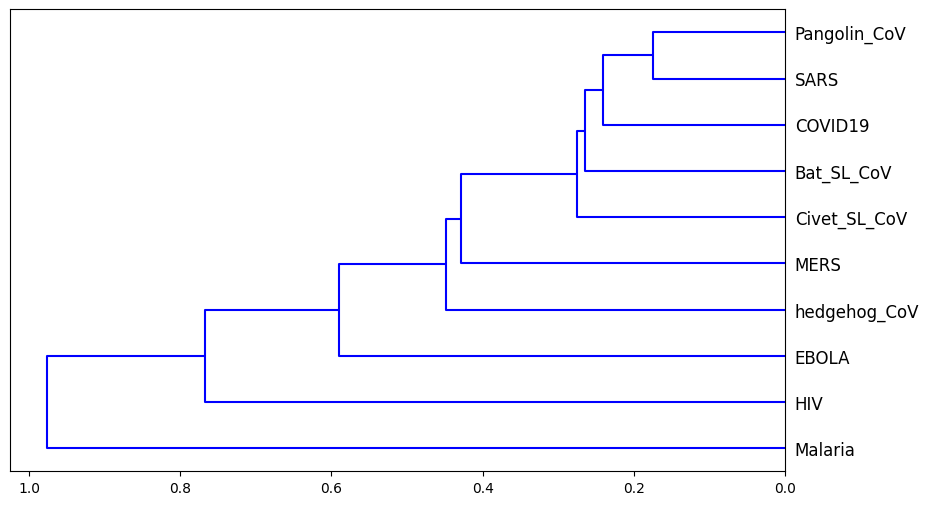

In [24]:
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Similarity scores for 10 genomes
similarity_scores = np.array([
    [1.00, 0.6984, 0.5057, 0.6895, 0.6924, 0.3429, 0.5029, 0.0003, 0.1994, 0.8209],
    [0.6984, 1.00, 0.5122, 0.6984, 0.6949, 0.3584, 0.5103, 0.0012, 0.2034, 0.8251],
    [0.5057, 0.5122, 1.00, 0.5219, 0.5189, 0.3024, 0.4859, 0.0010, 0.2001, 0.8003],
    [0.6895, 0.6984, 0.5219, 1.00, 0.6957, 0.3492, 0.5025, 0.0004, 0.1984, 0.8157],
    [0.6924, 0.6949, 0.5189, 0.6957, 1.00, 0.3518, 0.5042, 0.0005, 0.1999, 0.8194],
    [0.3429, 0.3584, 0.3024, 0.3492, 0.3518, 1.00, 0.4563, 0.0020, 0.2501, 0.7104],
    [0.5029, 0.5103, 0.4859, 0.5025, 0.5042, 0.4563, 1.00, 0.0030, 0.3004, 0.8047],
    [0.0003, 0.0012, 0.0010, 0.0004, 0.0005, 0.0020, 0.0030, 1.00, 0.0001, 0.2050],
    [0.1994, 0.2034, 0.2001, 0.1984, 0.1999, 0.2501, 0.3004, 0.0001, 1.00, 0.3077],
    [0.8209, 0.8251, 0.8003, 0.8157, 0.8194, 0.7104, 0.8047, 0.2050, 0.3077, 1.00]
])

# Convert similarity scores to distance (1 - similarity)
distance_matrix = 1 - similarity_scores

# Convert the square distance matrix to a condensed distance matrix
condensed_matrix = squareform(distance_matrix)

# Perform hierarchical clustering using the condensed distance matrix
Z = linkage(condensed_matrix, method='average')

# Plot the dendrogram flipped and in a single color
plt.figure(figsize=(10, 6))  # Adjust the figure size
dendrogram(
    Z,
    labels=["COVID19", "SARS", "MERS", "Civet_SL_CoV", "Bat_SL_CoV", "EBOLA", "hedgehog_CoV", "Malaria", "HIV", "Pangolin_CoV"],
    orientation='left',  # Flipped horizontal orientation
    leaf_font_size=12,  # Larger font for the labels
    color_threshold=0,  # Use a single color for all branches
    above_threshold_color='blue'  # Set the single color to blue
)

# Remove grid and display the tree
plt.grid(False)
plt.show()


In [ ]:
from ete3 import Tree, TreeStyle

# Newick format tree from the clustering
# Assuming Z contains the linkage matrix from the scipy clustering, for example
newick_tree = "(COVID19:0.1, (SARS:0.2, (MERS:0.3, (Civet_SL_CoV:0.4, Bat_SL_CoV:0.5))));"

# Create tree from Newick format
tree = Tree(newick_tree)

# Define the tree style as circular
ts = TreeStyle()
ts.mode = "c"  # Circular mode
ts.show_leaf_name = True  # Display leaf labels

# Render the circular tree
tree.show(tree_style=ts)


In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Similarity scores with respect to COVID19
# Rows: genomes compared directly to COVID19, where COVID19 is the last item
similarity_scores = np.array([
    [1.00, 0.6984, 0.5057, 0.6895, 0.6924, 0.3429, 0.5029, 0.1994, 0.8209, 1.00]  # COVID19 to all genomes
])

# Convert similarity scores to distance (1 - similarity)
distance_from_covid = 1 - similarity_scores.flatten()

# Create pairwise distance matrix where the last genome (COVID19) is compared to the rest
# Repeat COVID19 in last row/column to simulate its comparison with other genomes
distance_matrix = np.array([
    [0, 0.3016, 0.4943, 0.3105, 0.3076, 0.6571, 0.4971, 0.8006, 0.1791],
    [0.3016, 0, 0.4943, 0.3105, 0.3076, 0.6571, 0.4971, 0.8006, 0.1791],
    [0.4943, 0.4943, 0, 0.4781, 0.4811, 0.6976, 0.5141, 0.7999, 0.1997],
    [0.3105, 0.3105, 0.4781, 0, 0.3043, 0.6508, 0.4975, 0.8016, 0.1843],
    [0.3076, 0.3076, 0.4811, 0.3043, 0, 0.6482, 0.4958, 0.8001, 0.1806],
    [0.6571, 0.6571, 0.6976, 0.6508, 0.6482, 0, 0.5437, 0.7480, 0.2896],
    [0.4971, 0.4971, 0.5141, 0.4975, 0.4958, 0.5437, 0, 0.7030, 0.1996],
    [0.8006, 0.8006, 0.7999, 0.8016, 0.8001, 0.7480, 0.7030, 0, 0.7949],
    [0.1791, 0.1791, 0.1997, 0.1843, 0.1806, 0.2896, 0.1996, 0.7949, 0]
])

# Perform hierarchical clustering using the distance matrix
Z = linkage(squareform(distance_matrix), method='average')

# Plot the dendrogram with genomes compared to COVID19 only
plt.figure(figsize=(10, 6))  # Adjust the figure size
dendrogram(
    Z,
    labels=["SARS", "MERS", "Civet_SL_CoV", "Bat_SL_CoV", "EBOLA", "hedgehog_CoV", "Malaria", "HIV", "COVID19"],
    orientation='right',  # Horizontal orientation, COVID19 at the end
    leaf_font_size=12,  # Larger font for the labels
    color_threshold=0,  # Use a single color for all branches
    above_threshold_color='blue'  # Set the single color to blue
)

# Remove grid and display the tree
plt.grid(False)
plt.title('Phylogenetic Tree: All Genomes Compared to COVID19')
plt.show()
